# Étapes pour un projet d'analyse de données:
1. Définir l'énoncé du problème (Problème commercial).
2. Collecter les données après avoir identifier la source.
3. Explorer et néttoyer les données.
4. Faire l'analyse en fonction du problème accompagné des visualisations.
5. Présenter le resultat final en termes de rapport.

## Exemple d'application: Analyse des annulations de reservations d'hôtels.

## 1. Problème commercial:
**Ces dernières années, City Hotel et Resort Hotel ont connu des taux d'annulation élevés. Chaque hôtel est désormais confronté à un certain nombre de problèmes, notamment une baisse des revenus et une utilisation des chambres d'hôtel moins qu'idéale. Par conséquent, la réduction des taux d'annulation est à la fois l'objectif principal des hôtels afin d'augmenter leur efficacité dans la génération de revenus, et pour nous d'offrir des conseils commerciaux approfondis pour résoudre ce problème.**

**L'analyse des annulations de réservations d'hôtel ainsi que d'autres facteurs qui n'ont aucune incidence sur leur activité et la génération de revenus annuels sont les principaux sujets de ce rapport.**

# Hypothèses:
1. Aucun événement inhabituel entre 2015 et 2017 n'aura d'impact substantiel sur les données utilisées.

2. Les informations sont toujours d'actualité et peuvent être utilisées pour analyser les plans possibles d'un hôtel de manière efficace.

3. Il n'y a aucun effet négatif imprévu pour l'hôtel employant une technique conseillée.

4. Les hôtels n'utilisent actuellement aucune des solutions suggérées.

5. Le facteur le plus important qui affecte l'efficacité de la génération de revenus est l'annulation des réservations.

6. Les annulations entraînent des chambres vacantes pendant la durée réservée.

7. Les clients font des réservations d'hôtel la même année qu'ils annulent.

# Question de recherche
1. Quelles sont les variables qui affectent les annulations de réservations d'hôtel ?

2. Comment pouvons-nous améliorer les annulations de réservations d'hôtel ?

3. Comment les hôtels seront-ils aidés dans la prise de décisions en matière de prix et de promotions ?

# Hypothèse

1. Plus les prix sont élevés, plus les annulations sont fréquentes.

2. Lorsque la liste d'attente est longue, les clients ont tendance à annuler plus fréquemment.

3. La majorité des clients viennent d'agences de voyages hors ligne pour effectuer leurs réservations.

# Analyse du projet

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
chemin = "/home/ibrahim/Bureau/Document_important/Document_DA/Données_projets/hotel_booking.csv"

In [4]:
data = pd.read_csv(chemin)

# Exploration des données et nettoyage de données:

In [7]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [8]:
data.shape

(119390, 36)

In [9]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [15]:
data.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [16]:
#Vérifications des différentes valeurs des colonnes de types object:
for col in data.describe(include = 'object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [33]:
#Vérification des valeurs manquantes:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#Comme les colonnes 'agent' et 'company' ont beaucoup de valeurs manquantes, on va supprimer ces deux colonnes:
data.drop(['agent', 'company'], axis = 1, inplace = True)

In [29]:
data.dropna(inplace = True)

In [34]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [35]:
data = data[data['adr'] < 5000]

# Analyse et visualisation

In [38]:
pourcentage_annulee = data['is_canceled'].value_counts(normalize = True)
pourcentage_annulee = pourcentage_annulee.reset_index()
pourcentage_annulee

,is_canceled,proportion
0,0,0.628653
1,1,0.371347


In [44]:
# Interpretation:
print(f"Environ {(pourcentage_annulee['proportion'].loc[0])*100:.2f} des reservations ne sont pas annulées.\n\nTant dis que environ {(pourcentage_annulee['proportion'].loc[1])*100:.2f} des reservations sont annulées.")

Environ 62.87 des reservations ne sont pas annulées.

Tant dis que environ 37.13 des reservations sont annulées.


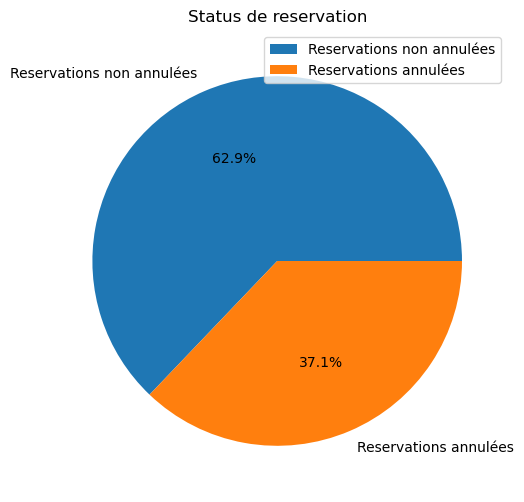

In [111]:
# Visualisation:
mylabels = ["Reservations non annulées", "Reservations annulées"]
plt.figure(figsize=(12, 6))
plt.clf()

plt.pie(
    data['is_canceled'].value_counts(normalize = True),
    autopct='%1.1f%%',
    labels = mylabels
)

plt.legend()
plt.title("Status de reservation")

# Enregistrer le graphique
plt.savefig("statuts_reserv.png", dpi=300, bbox_inches="tight")

plt.show()

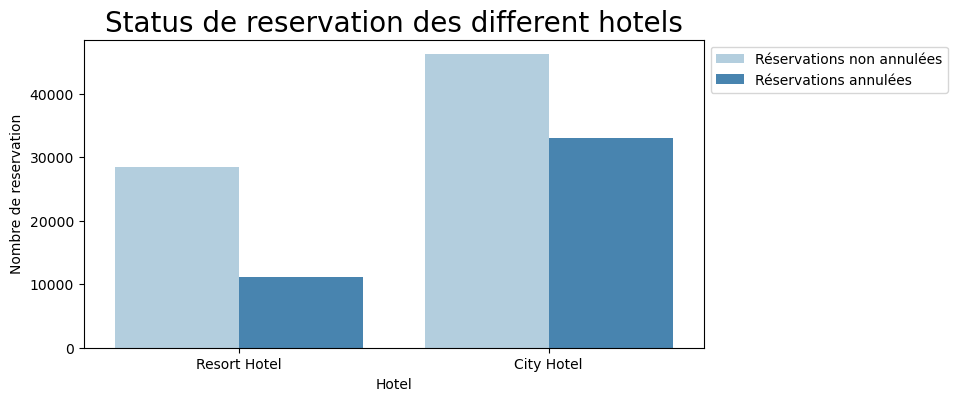

Ce graphique met en évidence une différence notable dans les taux de réservation et d’annulation entre les deux types d’hôtels. Une analyse plus approfondie des causes des annulations pourrait aider à optimiser la gestion des réservations et améliorer la rentabilité de l’établissement ayant le plus de pertes liées aux annulations.


In [110]:
#Visualisation sur toutes les hotels:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=data, palette='Blues')

#Récupération des labels légendaires.
legend_labels, _ = ax1.get_legend_handles_labels()

# Correction : Ajouter les labels et bien définir bbox_to_anchor
ax1.legend(legend_labels, ["Réservations non annulées", "Réservations annulées"], bbox_to_anchor=(1,1))

plt.title("Status de reservation des different hotels", size = 20)
plt.xlabel("Hotel")
plt.ylabel("Nombre de reservation")

# Enregistrer le graphique
plt.savefig("statuts_reser_hotel.png", dpi=300, bbox_inches="tight")

plt.show()

print("Ce graphique met en évidence une différence notable dans les taux de réservation et d’annulation entre les deux types d’hôtels. Une analyse plus approfondie des causes des annulations pourrait aider à optimiser la gestion des réservations et améliorer la rentabilité de l’établissement ayant le plus de pertes liées aux annulations.")

In [57]:
#Déterminons le pourcentage d'annulation des reservations de "Resort Hotel":
resort_hotel = data[data['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [58]:
#Déterminons le pourcentage d'annulation des reservations de "City Hotel":
city_hotel = data[data['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [60]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

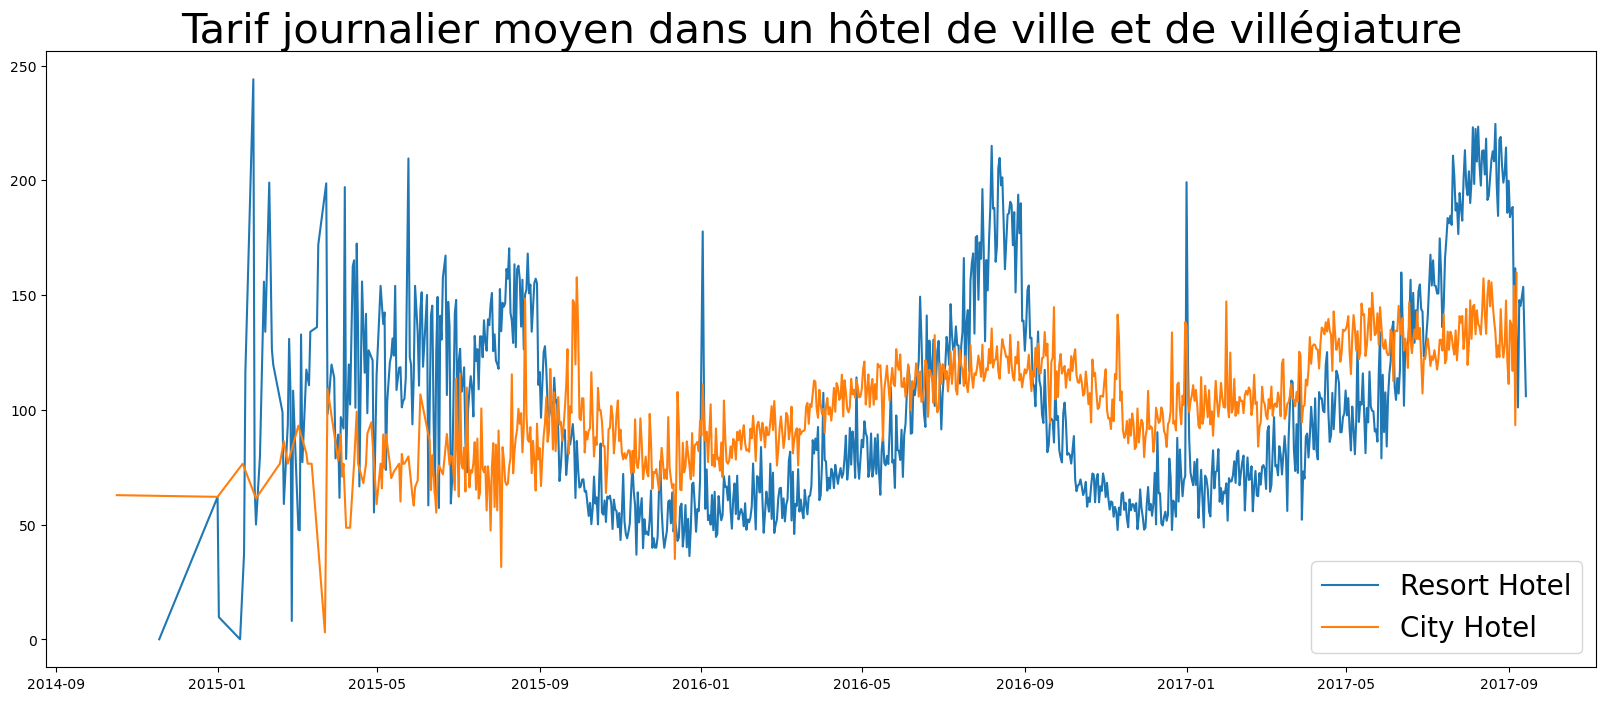

In [109]:
#Visualisation sur toutes les hotels:
plt.figure(figsize=(20, 8))
plt.clf()

plt.title("Tarif journalier moyen dans un hôtel de ville et de villégiature", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')

plt.legend(fontsize=20)

# Enregistrer le graphique
plt.savefig("ADR_hotel.png", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
#Création d'un visuel pour les reservations par mois:

In [65]:
#Création d'une colonne month:
data['month'] = data['reservation_status_date'].dt.month

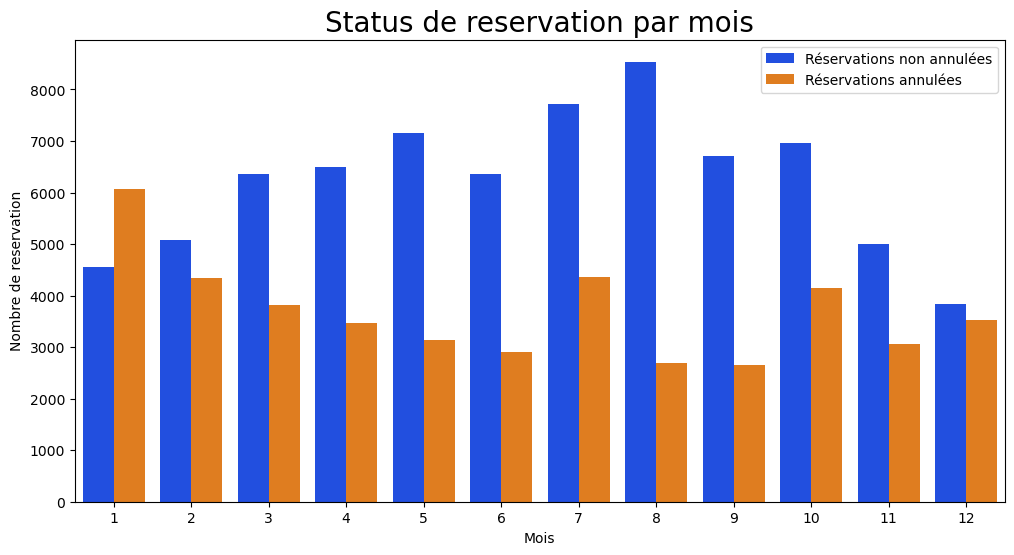

In [108]:
plt.figure(figsize=(12, 6))

ax1 = sns.countplot(x='month', hue='is_canceled', data=data, palette='bright')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))

plt.title("Status de reservation par mois", size = 20)
plt.xlabel("Mois")
plt.ylabel("Nombre de reservation")
plt.legend(["Réservations non annulées", "Réservations annulées"])

# Enregistrer le graphique
plt.savefig("statuts_reservation.png", dpi=300, bbox_inches="tight")

plt.show()

In [69]:
#Tarif moyen par mois:
adr_per_month = data[data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

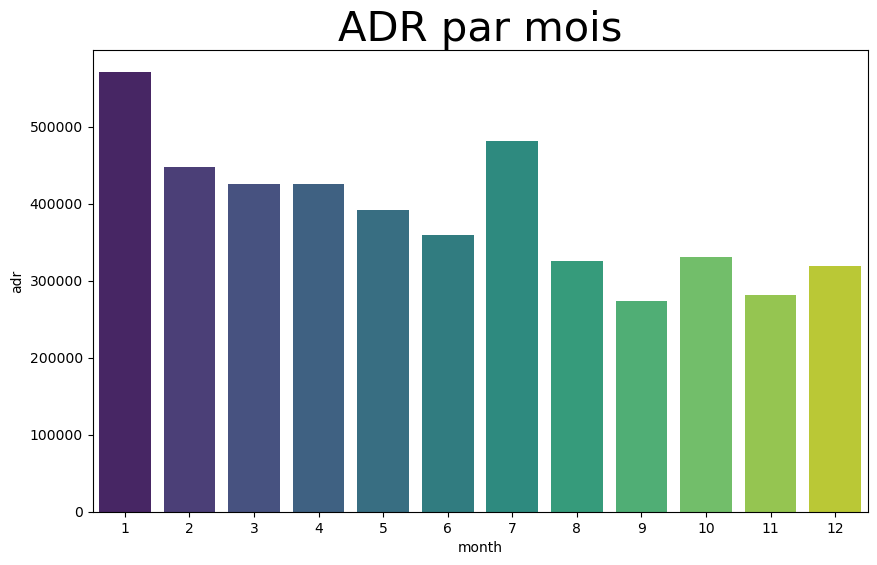

In [107]:
#Visualisation du tarif moyen par mois:
plt.figure(figsize=(10, 6))
plt.clf()

sns.barplot(x='month', y='adr', data=adr_per_month, palette="viridis") #ADR: Taux Moyen Journalier

# Enregistrer le graphique
plt.savefig("ADR_per_month.png", dpi=300, bbox_inches="tight")

plt.title("ADR par mois", fontsize=30)
plt.show()

In [79]:
cancelled_data = data[data['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
top_10_country

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

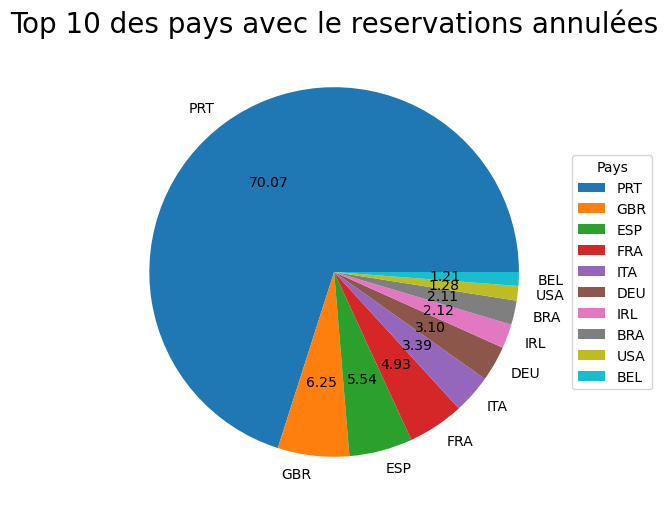

In [106]:
#Visualisation des pays avec le plus grand taux d'annulations:
plt.figure(figsize=(10, 6))

plt.pie(
    top_10_country,
    autopct='%.2f',
    labels = top_10_country.index
)
plt.legend(
    title="Pays", 
    bbox_to_anchor=(1, 0.5),  # Déplace la légende à droite
    loc="center left"
)

# Enregistrer le graphique
plt.savefig("top_10_country.png", dpi=300, bbox_inches="tight")

plt.title("Top 10 des pays avec le reservations annulées", fontsize=20)
plt.show()

In [92]:
#Provenance des reservations:
data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [113]:
df_provent_cost = data['market_segment'].value_counts(normalize=True)
df_provent_cost.reset_index()
df_provent_cost

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

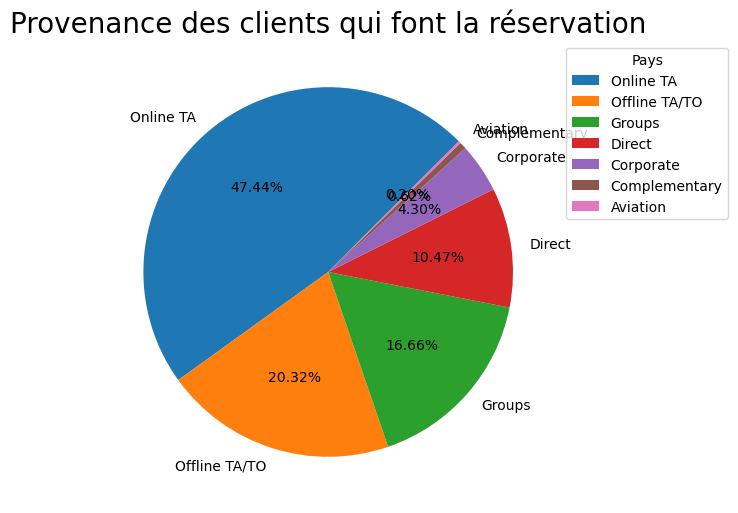

In [121]:
#Visualisation d'ou viennent les clients qui font des réservations?:
plt.figure(figsize=(10, 6))

plt.pie(
    df_provent_cost,
    autopct='%1.2f%%',
    startangle=45,
    labels = df_provent_cost.index
)
plt.legend(
    title="Pays", 
    bbox_to_anchor=(1, 0.8),  # Déplace la légende à droite
    loc="center left"
)

plt.title("Provenance des clients qui font la réservation", fontsize=20)

# Enregistrer le graphique
plt.savefig("provend.png", dpi=300, bbox_inches="tight")

plt.show()

In [93]:
#Taux d'annulation en fonction des provenances: 
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

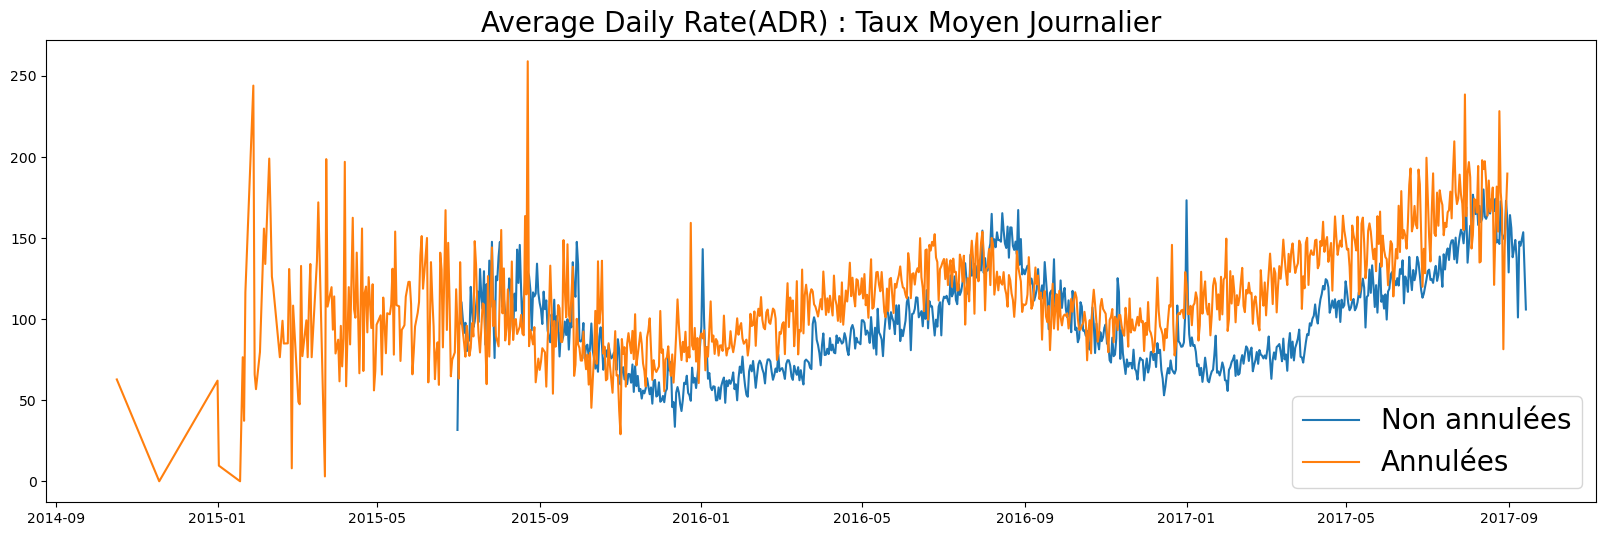

In [98]:
#Visualisation:

#Non annulées
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

#Annulées
not_cancelled_data = data[data['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

#Visualisations
plt.figure(figsize=(20,6 ))
plt.title("Average Daily Rate(ADR) : Taux Moyen Journalier", fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Non annulées')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Annulées')

plt.legend(fontsize=20)
plt.show()

In [103]:
#ADR entre 2016 et Septembre 2017
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] < '2017-09')]

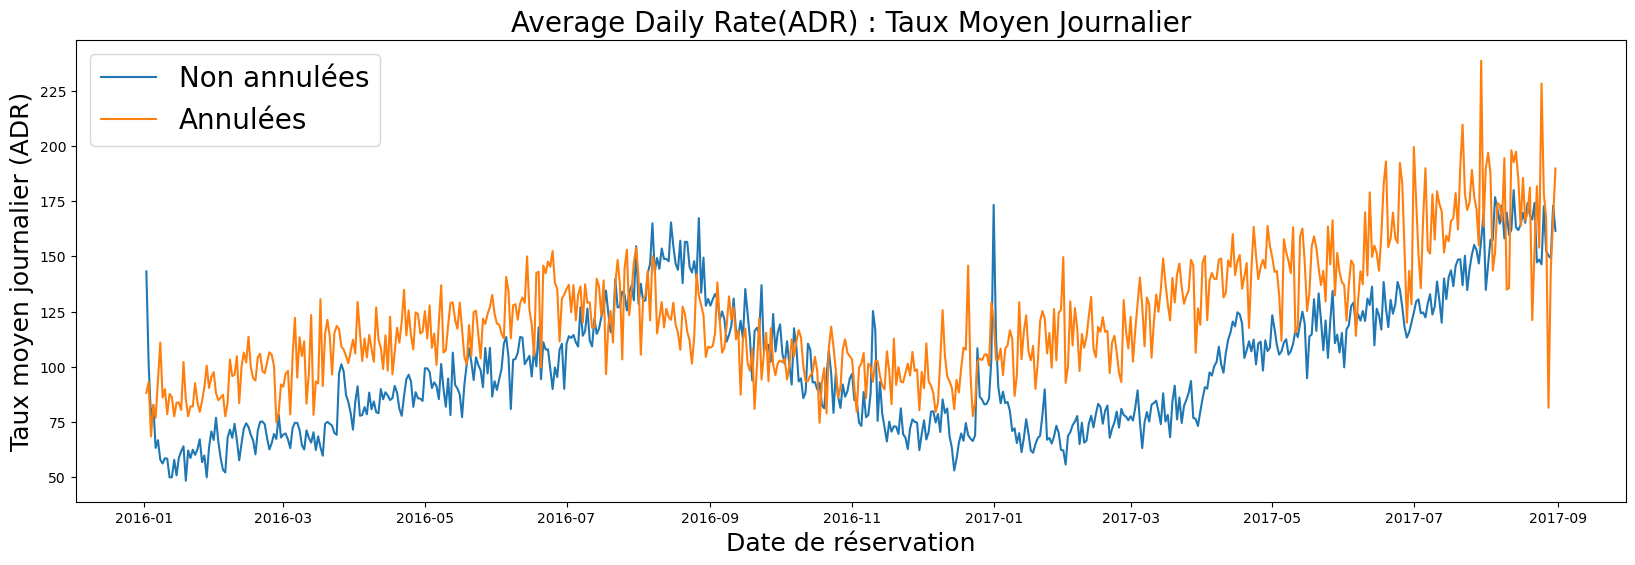

In [105]:
#Visualisations de l'ADR entre 2016 et Sept 2017
plt.figure(figsize=(20,6 ))
plt.title("Average Daily Rate(ADR) : Taux Moyen Journalier", fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Non annulées')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Annulées')

plt.legend(fontsize=20)
plt.xlabel('Date de réservation', fontsize=18)
plt.ylabel('Taux moyen journalier (ADR)', fontsize=18)

# Enregistrer le graphique
plt.savefig("ADR.png", dpi=300, bbox_inches="tight")

plt.show()